In [1]:
!pip install tensorflow_ranking
!pip install adversarial-robustness-toolbox
!pip uninstall numpy
!pip install numpy==1.23.5
!pip install keras==2.12
!pip install tensorflow-serving-api==2.12.0
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.4/150.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Found existing installation: numpy 1.23.2
Uninstalling numpy-1.23.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.0 MB/s eta 0:00:00
ERROR: Cannot install tensorflow-serving-api, tensorflow

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Reshape, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.initializers import GlorotUniform
import tensorflow as tf
import tensorflow_ranking as tfr
from keras.utils.np_utils import to_categorical
# import tf2onnx
import numpy as np
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, ProjectedGradientDescent

In [2]:
import sys
sys.path.append(sys.path.append('/content/drive/My Drive/CURIS/VeriX/train_networks'))

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tf.compat.v1.disable_eager_execution()

In [5]:
SEED = 137
input_path = 'drive/MyDrive/CURIS/VeriX/train_networks/gtsrb.pickle'
output_path = 'drive/MyDrive/CURIS/VeriX/networks/'

In [6]:
# Read and process dataset
import pickle
with open(input_path, 'rb') as handle:
    gtsrb = pickle.load(handle)

x_train, y_train, x_valid, y_valid, x_test, y_test = gtsrb.values()
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [7]:
import matplotlib.pyplot as plt
def plot_figure(image, path=None, cmap=None):
    fig = plt.figure()
    ax = plt.Axes(fig, [-0.5, -0.5, 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(image, cmap=cmap)
    if path is not None:
      plt.savefig(path, bbox_inches='tight')
    # plt.close(fig)

In [8]:
def eval_and_save(model):
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  model.summary()
  model.save(output_path + model.name + '.h5')
  # model_proto, _ = tf2onnx.convert.from_keras(model, output_path=output_path + model.name + '.onnx')

In [9]:
def print_weights(model):
  for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

In [10]:
def train_pgd(model_pgd, num_epochs, alpha):
  art_model_pgd = KerasClassifier(model_pgd, clip_values=(0, 1))
  art_model_pgd.fit(x_train, y_train,
              batch_size=128,
              nb_epochs=1,
              verbose=1,
              validation_data=(x_test, y_test))
  pgd_attack = ProjectedGradientDescent(art_model_pgd, eps=0.015, eps_step=0.001, max_iter=20, verbose=False)

  num_samples = len(x_train)
  num_adv = int(num_samples * alpha)
  num_real = num_samples - num_adv

  for i in range(num_epochs - 1):
    adv_indices = np.random.choice(x_train.shape[0], size=num_adv, replace=False)
    real_indices = np.random.choice(x_train.shape[0], size=num_real, replace=False)
    adv_samples = pgd_attack.generate(
        x_train[adv_indices],
        batch_size=128)
    x_real = x_train[real_indices]
    y_real = y_train[real_indices]
    x_adv = np.concatenate((adv_samples, x_real))
    y_adv = np.concatenate((y_train[adv_indices], y_real))
    permutation = np.random.permutation(num_samples)
    x_adv = x_adv[permutation]
    y_adv = y_adv[permutation]
    art_model_pgd.fit(x_adv, y_adv,
              batch_size=128,
              nb_epochs=1,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model_pgd.evaluate(adv_samples, y_train[adv_indices])
    print(f'adv train loss: {score[0]} train acc: {score[1]}')

In [11]:
def evaluate(model, model_adv):
  print('Test loss and accuracy on original test data:')
  print('Regular model:')
  print(model.evaluate(x_test, y_test))
  print('Adv model:')
  print(model_adv.evaluate(x_test, y_test))
  print('')

  print('Test loss and accuracy on adv samples from regular model:')
  art_model_regular_pgd = KerasClassifier(model, clip_values=(0, 1))
  # pgd_attack_regular = ProjectedGradientDescent(art_model_regular_pgd, eps=0.1, eps_step=0.01, max_iter=50, verbose=False)
  # adv = pgd_attack_regular.generate(x_test, batch_size=128)
  fgm_attack_regular = FastGradientMethod(art_model_regular_pgd)
  adv = fgm_attack_regular.generate(x_test, batch_size=128)
  print('Regular model:')
  print(model.evaluate(adv, y_test))
  print('Adv model:')
  print(model_adv.evaluate(adv, y_test))
  print('')

  print('Test loss and accuracy on adv samples from adv model:')
  art_model_adv_pgd = KerasClassifier(model_adv, clip_values=(0, 1))
  # pgd_attack_adv = ProjectedGradientDescent(art_model_adv_pgd, eps=0.1, eps_step=0.01, max_iter=50, verbose=False)
  # adv = pgd_attack_adv.generate(x_test, batch_size=128)
  fgm_attack_adv = FastGradientMethod(art_model_adv_pgd, eps=0.015)
  adv = fgm_attack_adv.generate(x_test, batch_size=128)
  print('Regular model:')
  print(model.evaluate(adv, y_test))
  print('Adv model:')
  print(model_adv.evaluate(adv, y_test))

10x2 fully connected

In [12]:
num_epochs = 20
alpha = 0.8 # proportion of adv samples

In [17]:
# exactly the same initial state of models
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(10, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(10, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_10x2 = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-10x2-normal')
model_10x2_pgd = tf.keras.models.clone_model(model_10x2)
model_10x2_pgd.set_weights(model_10x2.get_weights())
model_10x2.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model_10x2_pgd.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [18]:
# normally train
model_10x2.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 17550 samples, validate on 6480 samples
Epoch 1/20
17550/17550 [==============================] - 1s 76us/sample - loss: 2.0806 - accuracy: 0.2460 - val_loss: 1.9753 - val_accuracy: 0.2642
Epoch 2/20
17550/17550 [==============================] - 1s 72us/sample - loss: 1.8193 - accuracy: 0.3488 - val_loss: 1.7415 - val_accuracy: 0.3560
Epoch 3/20
17550/17550 [==============================] - 1s 63us/sample - loss: 1.6207 - accuracy: 0.4113 - val_loss: 1.6509 - val_accuracy: 0.3665
Epoch 4/20
17550/17550 [==============================] - 1s 70us/sample - loss: 1.5021 - accuracy: 0.4467 - val_loss: 1.5780 - val_accuracy: 0.4065
Epoch 5/20
17550/17550 [==============================] - 1s 64us/sample - loss: 1.4006 - accuracy: 0.4874 - val_loss: 1.4828 - val_accuracy: 0.4400
Epoch 6/20
17550/17550 [==============================] - 1s 68us/sample - loss: 1.3234 - accuracy: 0.5206 - val_loss: 1.4131 - val_accuracy: 0.4688
Epoch 7/20
17550/17550 [==============================] -

In [19]:
# adversarial training
train_pgd(model_10x2_pgd, num_epochs, alpha)

Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 42us/sample - loss: 2.1278 - accuracy: 0.1945 - val_loss: 1.9294 - val_accuracy: 0.2677


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 41us/sample - loss: 1.9419 - accuracy: 0.2514 - val_loss: 1.7440 - val_accuracy: 0.3128
adv train loss: 1.8401963530782282 train acc: 0.2909544110298157
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 40us/sample - loss: 1.8050 - accuracy: 0.2934 - val_loss: 1.6379 - val_accuracy: 0.3205
adv train loss: 1.742366678490598 train acc: 0.3102564215660095
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 31us/sample - loss: 1.7008 - accuracy: 0.3157 - val_loss: 1.5434 - val_accuracy: 0.3435
adv train loss: 1.6581616098045284 train acc: 0.3194444477558136
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 31us/sample - loss: 1.6082 - accuracy: 0.3831 - val_loss: 1.4560 - val_accuracy: 0.4546
adv train loss: 1.5711570544120592 train acc: 0.3957265019

In [20]:
evaluate(model_10x2, model_10x2_pgd)

Test loss and accuracy on original test data:
Regular model:
[1.114243170067116, 0.63132715]
Adv model:
[1.1094543839678352, 0.5743827]

Test loss and accuracy on adv samples from regular model:
Regular model:
[48.42848937423141, 0.07067901]
Adv model:
[7.0730528101509, 0.11851852]

Test loss and accuracy on adv samples from adv model:
Regular model:
[1.2830199456509248, 0.5544753]
Adv model:
[1.3822447211654099, 0.4425926]


In [ ]:
!ls drive/MyDrive/CURIS/VeriX/networks/

gtsrb-100x2.h5		 mnist-30x2-normal.h5
gtsrb-100x2.onnx	 mnist-30x2-normal.onnx
gtsrb-10x2.h5		 mnist-30x2.onnx
gtsrb-10x2.onnx		 mnist-30x2-pgd.h5
gtsrb-30x2.h5		 mnist-30x2-pgd.onnx
gtsrb-30x2.onnx		 mnist-bigger-cnn.h5
gtsrb-cnn-3x3.h5	 mnist-bigger-cnn.onnx
gtsrb-cnn-3x3.onnx	 mnist-bigger-cnn-pooling.h5
gtsrb-sota.h5		 mnist-bigger-cnn-pooling.onnx
gtsrb-sota.onnx		 mnist-cnn-3x3.h5
mnist-100x2.h5		 mnist-cnn-3x3.onnx
mnist-100x2-normal.h5	 mnist-cnn-pooling.h5
mnist-100x2-normal.onnx  mnist-cnn-pooling.onnx
mnist-100x2.onnx	 mnist-simple-cnn.h5
mnist-100x2-pgd.h5	 mnist-simple-cnn-normal.h5
mnist-100x2-pgd.onnx	 mnist-simple-cnn-normal.onnx
mnist-10x2.h5		 mnist-simple-cnn.onnx
mnist-10x2-normal.h5	 mnist-simple-cnn-pgd.h5
mnist-10x2-normal.onnx	 mnist-simple-cnn-pgd.onnx
mnist-10x2.onnx		 mnist-sota.h5
mnist-10x2-pgd.h5	 mnist-sota-normal.h5
mnist-10x2-pgd.onnx	 mnist-sota.onnx
mnist-30x2.h5		 mnist-sota-pgd.h5


In [21]:
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(30, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(30, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_30x2 = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-30x2-normal')
model_30x2.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model_30x2.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 17550 samples, validate on 6480 samples
Epoch 1/20
17550/17550 [==============================] - 1s 56us/sample - loss: 1.8958 - accuracy: 0.3925 - val_loss: 1.4788 - val_accuracy: 0.5802
Epoch 2/20
17550/17550 [==============================] - 1s 44us/sample - loss: 1.1946 - accuracy: 0.6839 - val_loss: 1.0486 - val_accuracy: 0.6932
Epoch 3/20
17550/17550 [==============================] - 1s 45us/sample - loss: 0.8496 - accuracy: 0.7834 - val_loss: 0.8576 - val_accuracy: 0.7591
Epoch 4/20
17550/17550 [==============================] - 1s 45us/sample - loss: 0.6601 - accuracy: 0.8295 - val_loss: 0.7204 - val_accuracy: 0.7852
Epoch 5/20
17550/17550 [==============================] - 1s 46us/sample - loss: 0.5499 - accuracy: 0.8545 - val_loss: 0.6290 - val_accuracy: 0.8037
Epoch 6/20
17550/17550 [==============================] - 1s 46us/sample - loss: 0.4767 - accuracy: 0.8744 - val_loss: 0.6255 - val_accuracy: 0.7890
Epoch 7/20
17550/17550 [==============================] -

In [22]:
art_model = KerasClassifier(model_30x2, clip_values=(0, 1))
fgm_attack = FastGradientMethod(art_model, eps=0.015)
adv = fgm_attack.generate(x_test, batch_size=128)

In [23]:
model_10x2.evaluate(adv, y_test)

[1.4910753779941135, 0.5089506]

In [24]:
model_10x2_pgd.evaluate(adv, y_test)

[1.2779113392771027, 0.5197531]

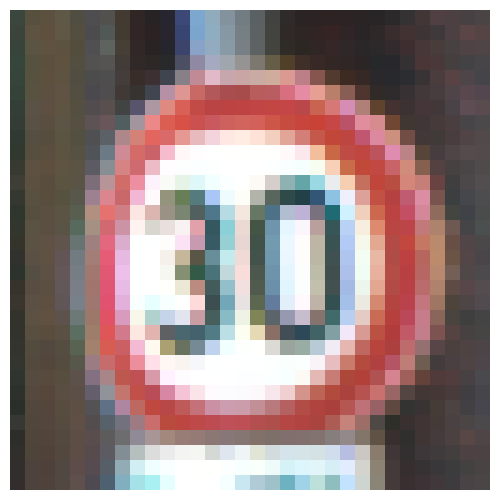

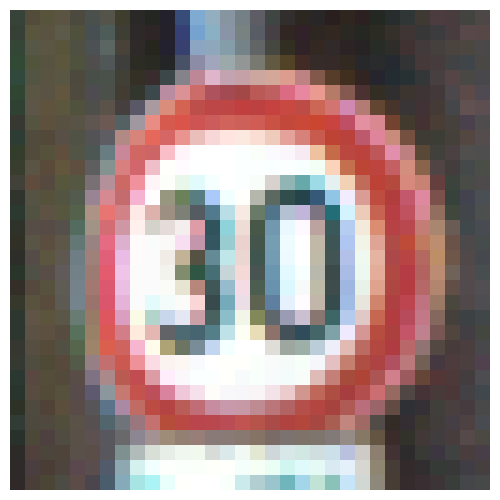

In [ ]:
index = 0
plot_figure(x_test[index])
plot_figure(adv[index])

In [34]:
eval_and_save(model_10x2)
# eval_and_save(model_pgd)

Test loss: 1.114243170067116
Test accuracy: 0.63132715
Model: "gtsrb-10x2-normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 logit (Dense)               (None, 10)                110       
                                                                 
Total params: 30,950
Trainable params: 30,950
Non-trainable params: 0
________________________________________________________

30x2 fully connected

In [ ]:
num_epochs = 20
alpha = 0.5 # proportion of adv samples

In [28]:
# normally trained model for compariaon
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(30, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(30, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-30x2-normal')
model.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 17550 samples, validate on 6480 samples
Epoch 1/20
17550/17550 [==============================] - 1s 65us/sample - loss: 1.7168 - accuracy: 0.4768 - val_loss: 1.3442 - val_accuracy: 0.5713
Epoch 2/20
17550/17550 [==============================] - 1s 48us/sample - loss: 1.0028 - accuracy: 0.7272 - val_loss: 0.9692 - val_accuracy: 0.6731
Epoch 3/20
17550/17550 [==============================] - 1s 49us/sample - loss: 0.7178 - accuracy: 0.8097 - val_loss: 0.8184 - val_accuracy: 0.7352
Epoch 4/20
17550/17550 [==============================] - 1s 50us/sample - loss: 0.5680 - accuracy: 0.8557 - val_loss: 0.6792 - val_accuracy: 0.7860
Epoch 5/20
17550/17550 [==============================] - 1s 48us/sample - loss: 0.4562 - accuracy: 0.8921 - val_loss: 0.6560 - val_accuracy: 0.7900
Epoch 6/20
17550/17550 [==============================] - 1s 48us/sample - loss: 0.4073 - accuracy: 0.8995 - val_loss: 0.5733 - val_accuracy: 0.8235
Epoch 7/20
17550/17550 [==============================] -

In [25]:
# model for adversarial training with pgd
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(30, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(30, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_pgd = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-30x2-pgd')
model_pgd.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [26]:
train_pgd(model_pgd, num_epochs, alpha)

Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 36us/sample - loss: 1.7144 - accuracy: 0.4754 - val_loss: 1.2574 - val_accuracy: 0.6259
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 30us/sample - loss: 1.1883 - accuracy: 0.6104 - val_loss: 0.8654 - val_accuracy: 0.7094
adv train loss: 1.0077777057971031 train acc: 0.6891738176345825
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 42us/sample - loss: 0.9840 - accuracy: 0.6588 - val_loss: 0.7382 - val_accuracy: 0.7546
adv train loss: 0.908269903123209 train acc: 0.6918091177940369
Train on 17550 samples, validate on 6480 samples
17550/17550 [==============================] - 1s 46us/sample - loss: 0.8782 - accuracy: 0.6901 - val_loss: 0.6581 - val_accuracy: 0.7870
adv train loss: 0.8306793617047475 train acc: 0.7107549905776978
Train on 17550 samples, validate on 6480 samples
17550/175

In [29]:
evaluate(model, model_pgd)

Test loss and accuracy on original test data:
Regular model:
[0.32724312243086323, 0.9175926]
Adv model:
[0.41593411196897057, 0.87993824]

Test loss and accuracy on adv samples from regular model:
Regular model:
[54.032532265745566, 0.02962963]
Adv model:
[20.60650613101912, 0.047376543]

Test loss and accuracy on adv samples from adv model:
Regular model:
[0.9934929431220632, 0.6845679]
Adv model:
[0.774662317905897, 0.70092595]


In [30]:
art_model = KerasClassifier(model_10x2, clip_values=(0, 1))
fgm_attack = FastGradientMethod(art_model, eps=0.015)
adv = fgm_attack.generate(x_test, batch_size=128)

In [31]:
model_10x2.evaluate(adv, y_test)

[3.3769863764444987, 0.23719136]

In [32]:
model_10x2_pgd.evaluate(adv, y_test)

[1.167645913730433, 0.525463]

In [33]:
eval_and_save(model)
eval_and_save(model_pgd)

Test loss: 0.32724312243086323
Test accuracy: 0.9175926
Model: "gtsrb-30x2-normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 30)                92190     
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 logit (Dense)               (None, 10)                310       
                                                                 
Total params: 93,430
Trainable params: 93,430
Non-trainable params: 0
_______________________________________________________

100x2 fully connected

In [ ]:
num_epochs = 20
alpha = 0.5 # proportion of adv samples

In [ ]:
# normally trained model for compariaon
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(100, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(100, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-100x2-normal')
model.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3409 - accuracy: 0.9020 - val_loss: 0.1795 - val_accuracy: 0.9455
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1399 - accuracy: 0.9587 - val_loss: 0.1216 - val_accuracy: 0.9630
Epoch 3/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.1003 - val_accuracy: 0.9675
Epoch 4/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0893 - val_accuracy: 0.9709
Epoch 5/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0879 - val_accuracy: 0.9726
Epoch 6/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 7/20
60000/60000 [==============================] 

In [ ]:
# model for adversarial training with pgd
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(100, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(100, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_pgd = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-100x2-pgd')
model_pgd.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [ ]:
train_pgd(model_pgd, num_epochs, alpha)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3485 - accuracy: 0.8993 - val_loss: 0.1720 - val_accuracy: 0.9490
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2155 - accuracy: 0.9358 - val_loss: 0.1238 - val_accuracy: 0.9623
adv train loss: 0.11473088092257579 train acc: 0.9653000235557556
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2434 - accuracy: 0.9307 - val_loss: 0.1162 - val_accuracy: 0.9643
adv train loss: 0.10867337775677442 train acc: 0.9684000015258789
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1843 - accuracy: 0.9484 - val_loss: 0.0990 - val_accuracy: 0.9704
adv train loss: 0.09152162838528553 train acc: 0.972599983215332
Train on 60000 samples, validate on 10000 samples
6

In [ ]:
evaluate(model, model_pgd)

Test loss and accuracy on original test data:
Regular model:
[0.10720364366221183, 0.9769]
Adv model:
[0.0680444527752581, 0.9778]

Test loss and accuracy on adv samples from regular model:
Regular model:
[35.847421008300785, 0.0311]
Adv model:
[1.3557057939052581, 0.599]

Test loss and accuracy on adv samples from adv model:
Regular model:
[9.888806645202637, 0.1419]
Adv model:
[17.42983818359375, 0.0171]


In [ ]:
eval_and_save(model)
eval_and_save(model_pgd)

Test loss: 0.10720364366221183
Test accuracy: 0.9769
Model: "mnist-100x2-normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 logit (Dense)               (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________

cnn-simple

In [ ]:
inputs = Input(shape=(32, 32, 3))
x = Conv2D(4, (3, 3), name='conv_1', input_shape=(32, 32, 3), kernel_initializer=GlorotUniform(seed=SEED))(inputs)
x = Conv2D(4, (2, 2), strides=(2, 2), name='conv_2', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Flatten()(x)
x = Dense(20, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model = tf.keras.Model(inputs=inputs, outputs=x, name='gtsrb-simple-cnn-normal')

model.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5132 - accuracy: 0.8463 - val_loss: 0.2605 - val_accuracy: 0.9250
Epoch 2/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2464 - accuracy: 0.9289 - val_loss: 0.2229 - val_accuracy: 0.9357
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2163 - accuracy: 0.9367 - val_loss: 0.1968 - val_accuracy: 0.9431
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1961 - accuracy: 0.9431 - val_loss: 0.1827 - val_accuracy: 0.9500
Epoch 5/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1795 - accuracy: 0.9478 - val_loss: 0.1795 - val_accuracy: 0.9478
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1670 - accuracy: 0.9515 - val_loss: 0.1721 - val_accuracy: 0.9490
Epoch 7/20
60000/60000 [==============================]

In [ ]:
inputs = Input(shape=(32, 32, 3))
x = Conv2D(4, (3, 3), name='conv_1', input_shape=(32, 32, 3), kernel_initializer=GlorotUniform(seed=SEED))(inputs)
x = Conv2D(4, (2, 2), strides=(2, 2), name='conv_2', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Flatten()(x)
x = Dense(20, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_pgd = tf.keras.Model(inputs=inputs, outputs=x, name='gtsrb-simple-cnn-pgd')

model_pgd.compile(# loss='categorical_crossentropy',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [ ]:
train_pgd(model_pgd, num_epochs, alpha)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5137 - accuracy: 0.8450 - val_loss: 0.2625 - val_accuracy: 0.9267
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4068 - accuracy: 0.8761 - val_loss: 0.2608 - val_accuracy: 0.9228
adv train loss: 0.2736689247151216 train acc: 0.9194333553314209
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4150 - accuracy: 0.8756 - val_loss: 0.2112 - val_accuracy: 0.9388
adv train loss: 0.23954009110331537 train acc: 0.9315333366394043
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4006 - accuracy: 0.8777 - val_loss: 0.2047 - val_accuracy: 0.9413
adv train loss: 0.2569413528243701 train acc: 0.9260333180427551
Train on 60000 samples, validate on 10000 samples
60

In [ ]:
evaluate(model, model_pgd)

Test loss and accuracy on original test data:
Regular model:
[0.1402775631153956, 0.9617]
Adv model:
[0.1358160742379725, 0.957]

Test loss and accuracy on adv samples from regular model:
Regular model:
[30.704048516845702, 0.0203]
Adv model:
[3.211679522705078, 0.2333]

Test loss and accuracy on adv samples from adv model:
Regular model:
[9.01954021911621, 0.1164]
Adv model:
[15.926033908081054, 0.0269]


In [ ]:
eval_and_save(model)
eval_and_save(model_pgd)

Test loss: 0.1402775631153956
Test accuracy: 0.9617
Model: "mnist-simple-cnn-normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 4)         68        
                                                                 
 flatten_9 (Flatten)         (None, 676)               0         
                                                                 
 dense (Dense)               (None, 20)                13540     
                                                                 
 logit (Dense)               (None, 10)                210       
                                                         

cnn-sota

In [ ]:
num_epochs = 20
alpha = 0.5 # proportion of adv samples

In [ ]:
# normally trained model for comparision

inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_initializer=GlorotUniform(seed=SEED))(inputs)
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(200, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dropout(0.5, seed=SEED)(x)
x = Dense(200, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', activation='softmax', kernel_initializer=GlorotUniform(seed=SEED))(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-sota-normal')
model.compile(loss='categorical_crossentropy',
              # loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=num_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.9254

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 12s 192us/sample - loss: 0.2401 - accuracy: 0.9254 - val_loss: 0.0422 - val_accuracy: 0.9859
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0690 - accuracy: 0.9798 - val_loss: 0.0367 - val_accuracy: 0.9889
Epoch 3/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0205 - val_accuracy: 0.9932
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0236 - val_accuracy: 0.9932
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0257 - val_accuracy: 0.9925
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0272 - val_accuracy: 0.9931
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0238 - accuracy: 0.9926 - val_lo

In [ ]:
# model for adversarial training with pgd
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_initializer=GlorotUniform(seed=SEED))(inputs)
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(200, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dropout(0.5, seed=SEED)(x)
x = Dense(200, activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
outputs = Dense(10, name='logit', activation='softmax', kernel_initializer=GlorotUniform(seed=SEED))(x)
model_pgd = tf.keras.Model(inputs=inputs, outputs=outputs, name='gtsrb-sota-pgd')
model_pgd.compile(loss='categorical_crossentropy',
              # loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tfr.keras.losses.SoftmaxLoss(),
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [ ]:
train_pgd(model_pgd, num_epochs, alpha)

Train on 60000 samples, validate on 10000 samples
59904/60000 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9265

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 4s 72us/sample - loss: 0.2336 - accuracy: 0.9266 - val_loss: 0.0420 - val_accuracy: 0.9869


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.0300 - val_accuracy: 0.9901
adv train loss: 0.030231569734541698 train acc: 0.9902999997138977
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0540 - accuracy: 0.9844 - val_loss: 0.0230 - val_accuracy: 0.9928
adv train loss: 0.02148217306341588 train acc: 0.9935666918754578
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0529 - accuracy: 0.9845 - val_loss: 0.0208 - val_accuracy: 0.9931
adv train loss: 0.016763980462714486 train acc: 0.9946666955947876
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0427 - accuracy: 0.9875 - val_loss: 0.0238 - val_accuracy: 0.9920
adv train loss: 0.01356623228554769 train acc: 0

In [ ]:
evaluate(model, model_pgd)

Test loss and accuracy on original test data:
Regular model:
[0.025107924216459982, 0.9947]
Adv model:
[0.02079905009451977, 0.9944]

Test loss and accuracy on adv samples from regular model:


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Regular model:
[2.2156280811309816, 0.5203]
Adv model:
[0.6746757946014404, 0.7902]

Test loss and accuracy on adv samples from adv model:
Regular model:
[0.32085431804656983, 0.902]
Adv model:
[1.0280582367897033, 0.7158]


In [ ]:
eval_and_save(model)
eval_and_save(model_pgd)

Test loss: 0.025107924216459982
Test accuracy: 0.9947
Model: "mnist-sota-normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928 

In [ ]:
inp = Input(shape=(32, 32, 3))
x = Flatten()(inp)
x = Dense(10, name='dense_1', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(10, name='dense_2', activation='relu', kernel_initializer=GlorotUniform(seed=SEED))(x)
x = Dense(10, name='logit', kernel_initializer=GlorotUniform(seed=SEED))(x)

model_test = tf.keras.Model(inputs=inp, outputs=x)
model_test.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=['accuracy'])

art_model_test = KerasClassifier(model=model, clip_values=(0, 1))
mini_batch_size = 50
pgd_attack = ProjectedGradientDescent(art_model_test,
                                      eps=0.1,
                                      eps_step=0.005,
                                      max_iter=40,
                                      batch_size=mini_batch_size)


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/40 [00:00<?, ?it/s]

[-24.668528]


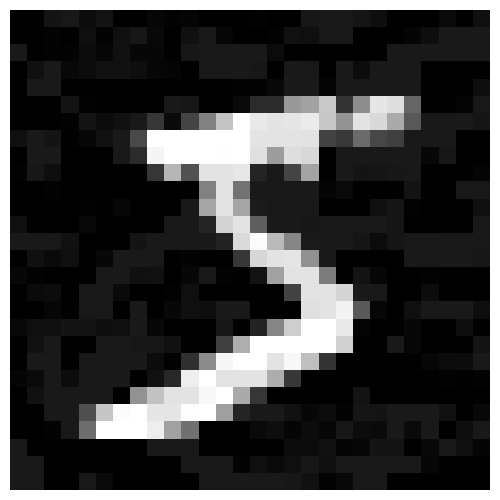

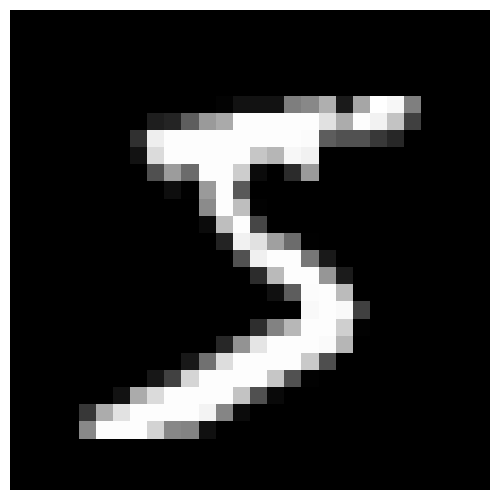

In [ ]:
adv = pgd_attack.generate(x_train[:10], batch_size=32)
plot_figure(adv[0], cmap='gray')
plot_figure(x_train[0], cmap='gray')
print(sum(sum(x_train[0] - adv[0])))